![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.





In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.shape

(7043, 16)

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [6]:
### Changing the datatype of total charges
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [7]:
## checking the data types
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Finding NULL values

In [8]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churnData['TotalCharges'].isna().sum()

11

In [10]:
## Converting the NA values to mean of the Total Charges
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [11]:
churnData['TotalCharges'].isna().sum()

0

In [12]:
### Checking the target variable

In [13]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
### Collecting data from the mentioned columns
churnData[['TotalCharges','tenure', 'SeniorCitizen','MonthlyCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCharges    7043 non-null   float64
 1   tenure          7043 non-null   int64  
 2   SeniorCitizen   7043 non-null   int64  
 3   MonthlyCharges  7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [15]:
feature_columns = churnData[['TotalCharges','tenure', 'SeniorCitizen','MonthlyCharges']]

TotalCharges


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


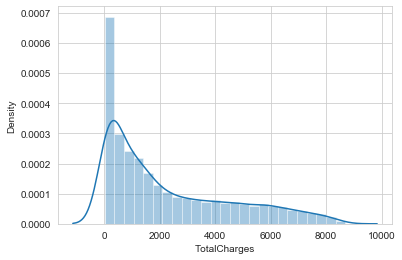

tenure


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


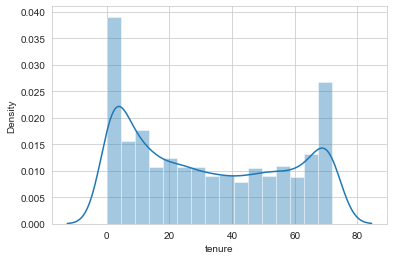

SeniorCitizen


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


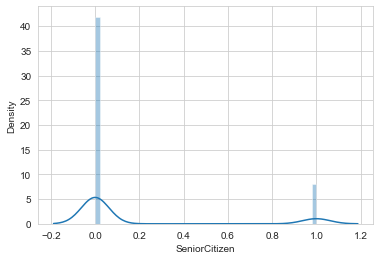

MonthlyCharges


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


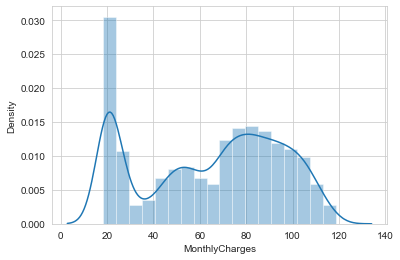

In [16]:
### checking the columns by distplot
for col in feature_columns:
    print (col)
    sns.distplot(churnData[col])
    plt.show()

In [17]:
### Heat Map for collinearity

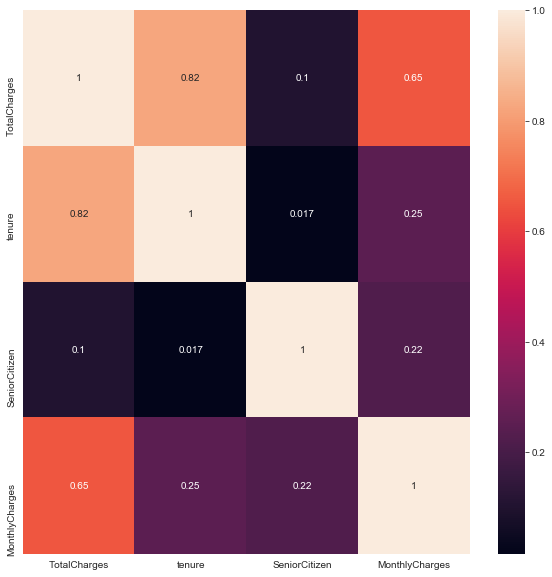

In [18]:
## checking the correlation of numerical columns with heat map
corr_matrix= feature_columns.corr(method='pearson') # default
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### X-Y train test split

In [19]:
y = churnData['Churn']
x = churnData[['TotalCharges','tenure', 'SeniorCitizen','MonthlyCharges']]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Logistic Regression on Raw Data

In [21]:
#### Importing relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

The accuracy of the model on test set is: 0.78 
The Kapa of your model is:  0.398
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1025
         Yes       0.64      0.46      0.54       384

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



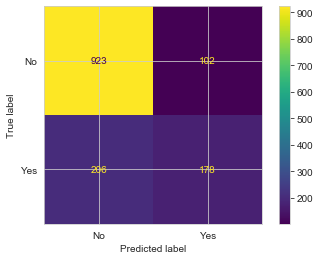

In [23]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print("The Kapa of your model is: ",round(cohen_kappa_score(y_test,predictions),3))
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()

### Tranforming the data

In [24]:
## standard scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x)
scaled_x = transformer.transform(x)

The accuracy of the logistic_regression model is: 0.78  

The kappa of the logistic regression model is: 0.39  

              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1025
         Yes       0.63      0.46      0.53       384

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



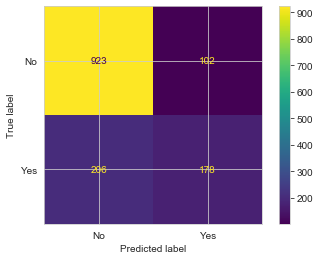

In [25]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(scaled_x, y, test_size=0.2, random_state=100)

reg_scale = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_scale, y_train_scale)
y_pred_scale = reg_scale.predict(X_test_scale)

print("The accuracy of the logistic_regression model is: %4.2f "% (reg_scale.score(X_test_scale, y_test_scale)),'\n')
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred_scale,y_test_scale)),'\n' )
print(classification_report(y_test_scale,y_pred_scale))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()

## SMOTE (over sampling) 

In [26]:
y = churnData['Churn']
x = churnData[['TotalCharges','tenure', 'SeniorCitizen','MonthlyCharges']]

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(x, y)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

No     5174
Yes    5174
dtype: int64

The accuracy of the logistic_regression model is: 0.73 
The kappa of the logistic regression model is: 0.45 
              precision    recall  f1-score   support

         Yes       0.70      0.77      0.73      1018
          No       0.75      0.68      0.72      1052

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070



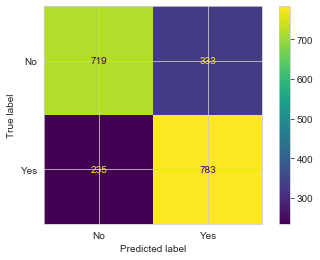

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=["Yes","No"]))

plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()

## Resampling (under sampling)

In [30]:
#downsample majority
from sklearn.utils import resample
not_credit_downsampled, y_res = resample(x[y == "No"],y[y == "No"],
                                replace=False, # sample without replacemente
                                n_samples=len(x[y == "Yes"]), # match minority n
                                random_state=0) #reproducible results



In [31]:
# combine minority and downsampled majority
downsampled = pd.concat([not_credit_downsampled, x[y == "Yes"]])
y_res = pd.concat([y_res, y[y == "Yes"]])
y_res.value_counts()



No     1869
Yes    1869
Name: Churn, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(downsampled, y_res, test_size=0.2, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train)

The accuracy of the logistic_regression model is: 0.72 
The kappa of the logistic regression model is: 0.45 
              precision    recall  f1-score   support

         Yes       0.71      0.74      0.72       364
          No       0.74      0.71      0.73       384

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.73      0.72      0.72       748



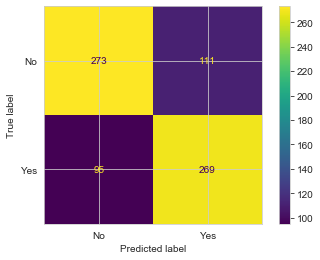

In [33]:
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=["Yes","No"]))

plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()

## Random Forest Classifier (with over sampled data)

In [34]:
## importing Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [35]:
## Taking the X,Y values from smote
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

#   svc = SVC(random_state=42)    svc.fit(X_train, y_train)
clf = RandomForestClassifier(random_state=56).fit(X_train, y_train.values.ravel())

In [36]:
predictions = clf.predict(X_test)

The accuracy of the logistic_regression model is: 0.78 
The kappa of the logistic regression model is: 0.56 
              precision    recall  f1-score   support

         Yes       0.78      0.78      0.78      1018
          No       0.78      0.78      0.78      1052

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



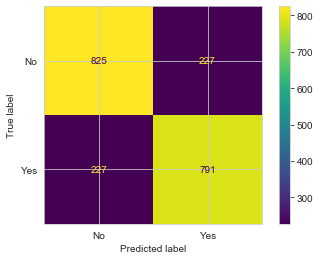

In [40]:
y_pred = clf.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (clf.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=["Yes","No"]))

plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()